## Linear Regression
A simple Linear Regression code using Gradient Descent algorithm. The following Least Square Error function is used as cost function.
\begin{equation*}
J = \frac{1}{2N} \sum \left(h(x_i) - y_i \right)^2
\end{equation*}
where,
\begin{equation*}
h(x_i) = m \times x_i + c
\end{equation*} 

is the hypothesis (predicted $y$ value for each $x$) 
and $N$ is the total number of datapoints.

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#function to create data. 
# by default 50 scatter points, slope=2 
#and intercept =1.0 randomness added 

def create_data(x,y, data_size=50, m=2.0, c=1.0):
    x = np.arange(data_size)
    
    rand = []
    for i in range(len(x)):
        rand.append(20*(np.random.rand()-0.5))
    rand=np.array(rand)
    #print(rand)
    y = m*x+c+rand
    return x,y,m,c, data_size

In [3]:
# create data
x = []
y = []
x,y, m_data, c_data, data_size = create_data(x,y)


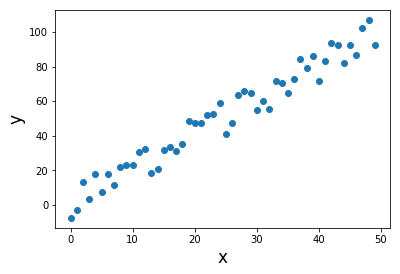

In [4]:
# how does the data look?
plt.scatter(x,y)
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)

In [5]:
# the work!

# we may quit when gradient descent converges (not used)
precision = 0.01

# maximum number of iterations and 
# learning rate 
max_iter = 5000
rate =0.002

# initial guesses for slope and intercept
# with a least square cost function, this doesn't matter
# it is guaranteed to reach the minimum
m_reg = 1.5
c_reg = 1.5

# the cost function (least square error)
cost = []
for t in range(max_iter):
    hypothetical = m_reg*x+c_reg
    #print(type(y))
    sum1 = np.sum(hypothetical-y)
    sum2 = np.sum((hypothetical-y)*x)
    c_temp = c_reg - rate*sum1/data_size
    m_temp = m_reg - rate*sum2/data_size
    m_reg = m_temp
    c_reg = c_temp
    cost.append((sum((hypothetical-y)**2 ))/(2*data_size))
    #print(cost[-1])

## Fitted values

In [6]:
print("Intended and fitted slops: ", m_data, m_reg)
print("Intended and fitted intercepts: ", c_data, c_reg)

Intended and fitted slops:  2.0 2.00827030654
Intended and fitted intercepts:  1.0 1.88860671484


**Note 1:** The actual slop and intercept may be different from the intended (input) values because we added noise to the data. As the sample size increases, the actual values will approach the intended values. Here we used rather a small dataset.

**Note 2:** The *rate* and *max_iter* may need some fine-tuning for optimal performance, depending on the dataset.

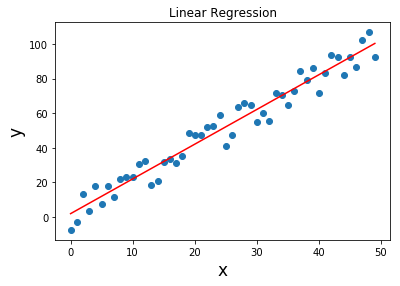

In [7]:
# let's plot it
plt.scatter(x,y)
plt.plot(x,hypothetical, 'r')
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)
plt.title('Linear Regression')

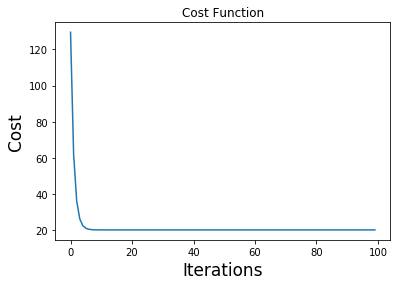

In [8]:
plt.plot(cost[:100])
plt.xlabel('Iterations', fontsize=17)
plt.ylabel('Cost', fontsize=17)
plt.title('Cost Function')

### Summary

This notebook creates a dataset of the form 
$y = m \times x + c $
and does a least-square fitting. 